#### Creating Arrays from Scratch

In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; 
seaborn.set()  # set plot styles

In [3]:
np.array([1, 4, 2, 5, 3])

np.array([3.14, 4, 2, 3])

array([3.14, 4.  , 2.  , 3.  ])

In [4]:
np.array([1, 2, 3, 4], dtype='float32')

array([1., 2., 3., 4.], dtype=float32)

In [5]:
# nested lists result in multi-dimensional arrays
np.array([range(i, i + 3) for i in [2, 4, 6]])

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

In [6]:
# Create a length-10 integer array filled with zeros
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
# Create a 3x5 floating-point array filled with ones
np.ones((3, 5), dtype=float)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [8]:
# Create a 3x5 array filled with 3.14
np.full((3, 5), 3.14)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [9]:
# Create an array filled with a linear sequence
# Starting at 0, ending at 20, stepping by 2
# (this is similar to the built-in range() function)
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [10]:
# Create an array of five values evenly spaced between 0 and 1
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [11]:
# Create a 3x3 array of uniformly distributed
# random values between 0 and 1
np.random.random((3, 3))

array([[0.1113019 , 0.47874411, 0.06851401],
       [0.7276889 , 0.77327314, 0.13857871],
       [0.16143532, 0.1085851 , 0.79415632]])

In [12]:
# Create a 3x3 array of normally distributed random values
# with mean 0 and standard deviation 1
np.random.normal(0, 1, (3, 3))

array([[-0.28630968, -1.52600506,  0.50357154],
       [ 0.88287291,  0.61270847, -0.09795336],
       [ 1.03910209, -0.30423334, -1.11654919]])

In [13]:
# Create a 3x3 array of random integers in the interval [0, 10)
np.random.randint(0, 10, (3, 3))

array([[7, 9, 0],
       [2, 2, 0],
       [5, 5, 1]])

In [14]:
# Create a 3x3 identity matrix
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [15]:
# Create an uninitialized array of three integers
# The values will be whatever happens to already exist at that memory location
np.empty(3)

array([1., 1., 1.])

In [16]:
np.random.seed(0)  # seed for reproducibility

x1 = np.random.randint(10, size=6)  # One-dimensional array
x2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array

print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)
print("dtype:", x3.dtype)


x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60
dtype: int32


#### Array Slicing: Accessing Subarrays

##### One-dimensional subarrays

In [17]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
x[:5]  # first five elements

array([0, 1, 2, 3, 4])

In [19]:
x[5:]  # elements after index 5

array([5, 6, 7, 8, 9])

In [20]:
x[4:7]  # middle sub-array

array([4, 5, 6])

In [21]:
x[::2]  # every other element

array([0, 2, 4, 6, 8])

In [22]:
x[1::2]  # every other element, starting at index 1

array([1, 3, 5, 7, 9])

In [23]:
x[::-1]  # all elements, reversed

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [24]:
x[5::-2]  # reversed every other from index 5

array([5, 3, 1])

##### Multi-dimensional subarrays

In [25]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [26]:
x2[:2, :3]  # two rows, three columns

array([[3, 5, 2],
       [7, 6, 8]])

In [27]:
x2[:3, ::2]  # all rows, every other column

array([[3, 2],
       [7, 8],
       [1, 7]])

In [28]:
x2[::-1, ::-1]  # subarray dimensions reversed together

array([[7, 7, 6, 1],
       [8, 8, 6, 7],
       [4, 2, 5, 3]])

##### Accessing array rows and columns
One commonly needed routine is accessing of single rows or columns of an array. This can be done by combining indexing and slicing, using an empty slice marked by a single colon (:):

In [29]:
print(x2[:, 0])  # first column of x2

[3 7 1]


In [30]:
print(x2[0, :])  # first row of x2

[3 5 2 4]


In [31]:
print(x2[0])  # equivalent to x2[0, :] (above)

[3 5 2 4]


##### Subarrays as no-copy views
One important–and extremely useful–thing to know about array slices is that they return views rather than copies of the array data. This is one area in which NumPy array slicing differs from Python list slicing: in lists, slices will be copies. Consider our two-dimensional array from before:

In [32]:
print(x2)

[[3 5 2 4]
 [7 6 8 8]
 [1 6 7 7]]


In [33]:
x2_sub = x2[:2, :2]
print(x2_sub)

[[3 5]
 [7 6]]


In [34]:
# Now if we modify this subarray, we'll see that the original array is changed! Observe:

x2_sub[0, 0] = 99
print(x2_sub)
print('--------------')
print(x2)

[[99  5]
 [ 7  6]]
--------------
[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


In [35]:
x2_sub_copy = x2[:2, :2].copy()
print(x2_sub_copy)
print('--------------')

x2_sub_copy[0, 0] = 42
print(x2_sub_copy)
print('--------------')

print(x2)

[[99  5]
 [ 7  6]]
--------------
[[42  5]
 [ 7  6]]
--------------
[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


#### Reshaping of Arrays

In [36]:
grid = np.arange(1, 10)
print(grid)
print('--------------')
grid = grid.reshape((3, 3))
print(grid)

[1 2 3 4 5 6 7 8 9]
--------------
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [37]:
x = np.array([1, 2, 3])
print(x)
# row vector via reshape
x.reshape((1, 3))

[1 2 3]


array([[1, 2, 3]])

In [38]:
# row vector via newaxis
x[np.newaxis, :]

array([[1, 2, 3]])

In [39]:
# column vector via reshape
x.reshape((3, 1))

array([[1],
       [2],
       [3]])

In [40]:
# column vector via newaxis
x[:, np.newaxis]

array([[1],
       [2],
       [3]])

#### Array Concatenation and Splitting

In [41]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

In [42]:
# concatenate more than two arrays at once

z = [99, 99, 99]
print(np.concatenate([x, y, z]))

[ 1  2  3  3  2  1 99 99 99]


In [43]:
# two-dimensional arrays
 
grid = np.array([[1, 2, 3],
                 [4, 5, 6]])

# concatenate along the first axis (along rows)
np.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [44]:
# concatenate along the second axis (zero-indexed) (along columns)
np.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

In [45]:
# For working with arrays of mixed dimensions, it can be clearer to use the np.vstack (vertical stack) and np.hstack (horizontal stack) functions:

x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7],
                 [6, 5, 4]])

# vertically stack the arrays
np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [46]:
# horizontally stack the arrays
y = np.array([[99],
              [99]])
np.hstack([grid, y])

# Similary, np.dstack will stack arrays along the third axis.

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

##### Splitting of arrays

In [47]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])    # split at 3 and 5
print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


In [48]:
grid = np.arange(16).reshape((4, 4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [49]:
upper, lower = np.vsplit(grid, [2]) # vertical split at 2
print(upper)
print(lower)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


In [50]:
left, right = np.hsplit(grid, [2])  # horizontal split at 2
print(left)
print(right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


#### Computation on NumPy Arrays: Universal Functions (UFuncs)

In [51]:
x = np.arange(4)
print("x     =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2)  # floor division
print("-x     = ", -x)
print("x ** 2 = ", x ** 2)
print("x % 2  = ", x % 2)

x     = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]
-x     =  [ 0 -1 -2 -3]
x ** 2 =  [0 1 4 9]
x % 2  =  [0 1 0 1]


##### Trigonometric functions

In [52]:
theta = np.linspace(0, np.pi, 3)
print("theta      = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

theta      =  [0.         1.57079633 3.14159265]
sin(theta) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


In [53]:
# Inverse trigonometric functions

x = [-1, 0, 1]
print("x         = ", x)
print("arcsin(x) = ", np.arcsin(x))
print("arccos(x) = ", np.arccos(x))
print("arctan(x) = ", np.arctan(x))

x         =  [-1, 0, 1]
arcsin(x) =  [-1.57079633  0.          1.57079633]
arccos(x) =  [3.14159265 1.57079633 0.        ]
arctan(x) =  [-0.78539816  0.          0.78539816]


##### Exponents and logarithms

In [54]:
x = [1, 2, 3]
print("x     =", x)
print("e^x   =", np.exp(x))
print("2^x   =", np.exp2(x))
print("3^x   =", np.power(3, x))
print('.')

x = [1, 2, 4, 10]
print("x        =", x)
print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))
print('.')

x = [0, 0.001, 0.01, 0.1]
print("exp(x) - 1 =", np.expm1(x))
print("log(1 + x) =", np.log1p(x))

x     = [1, 2, 3]
e^x   = [ 2.71828183  7.3890561  20.08553692]
2^x   = [2. 4. 8.]
3^x   = [ 3  9 27]
.
x        = [1, 2, 4, 10]
ln(x)    = [0.         0.69314718 1.38629436 2.30258509]
log2(x)  = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]
.
exp(x) - 1 = [0.         0.0010005  0.01005017 0.10517092]
log(1 + x) = [0.         0.0009995  0.00995033 0.09531018]


In [55]:
from scipy import special

# Gamma functions (generalized factorials) and related functions
x = [1, 5, 10]
print("gamma(x)     =", special.gamma(x))
print("ln|gamma(x)| =", special.gammaln(x))
print("beta(x, 2)   =", special.beta(x, 2))

gamma(x)     = [1.0000e+00 2.4000e+01 3.6288e+05]
ln|gamma(x)| = [ 0.          3.17805383 12.80182748]
beta(x, 2)   = [0.5        0.03333333 0.00909091]


In [56]:
# Error function (integral of Gaussian)
# its complement, and its inverse
x = np.array([0, 0.3, 0.7, 1.0])
print("erf(x)  =", special.erf(x))
print("erfc(x) =", special.erfc(x))
print("erfinv(x) =", special.erfinv(x))

erf(x)  = [0.         0.32862676 0.67780119 0.84270079]
erfc(x) = [1.         0.67137324 0.32219881 0.15729921]
erfinv(x) = [0.         0.27246271 0.73286908        inf]


##### Specifying output

In [57]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)   # For all ufuncs, can be done using the out argument of the function
print(y)

[ 0. 10. 20. 30. 40.]


In [58]:
y = np.zeros(10)
np.power(2, x, out=y[::2])
print(y)

[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


##### Aggregates
For binary ufuncs, there are some interesting aggregates that can be computed directly from the object. For example, if we'd like to reduce an array with a particular operation, we can use the reduce method of any ufunc. A reduce repeatedly applies a given operation to the elements of an array until only a single result remains.

In [59]:
x = np.arange(1, 6)
np.add.reduce(x)

15

In [60]:
np.multiply.reduce(x)

120

In [61]:
# If we'd like to store all the intermediate results of the computation, we can instead use accumulate:

np.add.accumulate(x)

array([ 1,  3,  6, 10, 15], dtype=int32)

#### Aggregations: Min, Max, and Everything In Between

In [62]:
big_array = np.random.rand(1000000)
big_array

array([0.65279032, 0.63505887, 0.99529957, ..., 0.78889139, 0.11126952,
       0.56023426])

In [63]:
min(big_array), max(big_array)

np.min(big_array), np.max(big_array)

print(big_array.min(), big_array.max(), big_array.sum())

# Whenever possible, make sure that you are using the NumPy version of these aggregates when operating on NumPy arrays!

1.4057692298008462e-06 0.9999994392723005 500209.12067471276


##### Multi dimensional aggregates

In [64]:
M = np.random.random((3, 4))
print(M)

[[0.0049466  0.25863997 0.62346477 0.90474173]
 [0.71661557 0.699582   0.80401456 0.60471376]
 [0.43905815 0.73525983 0.3703232  0.57361603]]


In [65]:
M.sum()

6.734976167538792

In [66]:
M.min(axis=0)   # find the minimum value within each column by specifying axis=0 (column-wise)

array([0.0049466 , 0.25863997, 0.3703232 , 0.57361603])

In [67]:
M.min(axis=1)   # find the minimum value within each row by specifying axis=1 (row-wise)

array([0.0049466 , 0.60471376, 0.3703232 ])

In [68]:
# Function Name	 NaN-safe Version	Description
# np.sum	     np.nansum	        Compute sum of elements
# np.prod	     np.nanprod	        Compute product of elements
# np.mean	     np.nanmean	        Compute mean of elements
# np.std	     np.nanstd	        Compute standard deviation
# np.var	     np.nanvar	        Compute variance
# np.min	     np.nanmin	        Find minimum value
# np.max	     np.nanmax	        Find maximum value
# np.argmin	     np.nanargmin	    Find index of minimum value
# np.argmax	     np.nanargmax	    Find index of maximum value
# np.median	     np.nanmedian	    Compute median of elements
# np.percentile	 np.nanpercentile	Compute rank-based statistics of elements
# np.any	     N/A	            Evaluate whether any elements are true
# np.all	     N/A	            Evaluate whether all elements are true

#### Computation on Arrays: Broadcasting

In [69]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b
# OR
a + 5

array([5, 6, 7])

In [70]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [71]:
M + a

# Here the one-dimensional array a is stretched, or broadcast across the second dimension in order to match the shape of M.

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [72]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

print(a)
print(b)

a + b

[0 1 2]
[[0]
 [1]
 [2]]


array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [73]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

##### Rules of Broadcasting
* Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.
* Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
* Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

In [74]:
# Broadcasting example 1

M = np.ones((2, 3))
a = np.arange(3)

print(M, a)

M + a

[[1. 1. 1.]
 [1. 1. 1.]] [0 1 2]


array([[1., 2., 3.],
       [1., 2., 3.]])

In [75]:
# Broadcasting example 2

a = np.arange(3).reshape((3, 1))
b = np.arange(3)

print(a, b)
a + b

[[0]
 [1]
 [2]] [0 1 2]


array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [76]:
# Broadcasting example 3

M = np.ones((3, 2))
a = np.arange(3)

print(M, a)

M + a

# because for right-side padding, we need to do this explicitly by reshaping the array (or use the np.newaxis)

[[1. 1.]
 [1. 1.]
 [1. 1.]] [0 1 2]


ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [78]:
M + a[:, np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

##### Broadcasting in Practice
Centering an array

In [79]:
#  Imagine an array of 10 observations, each of which consists of 3 values. we'll store this in a 10x3 array:
X = np.random.random((10, 3))
Xmean = X.mean(0)   # mean of each feature

# center the X array by subtracting the mean (this is a broadcasting operation)
Xcentered = X - Xmean
Xcentered

array([[ 0.26417541, -0.29693555,  0.1195698 ],
       [-0.07502571, -0.27596032,  0.07665684],
       [ 0.38425641, -0.0431827 , -0.23071327],
       [ 0.46467278,  0.13839484, -0.31457379],
       [-0.20256203,  0.07610375,  0.3608951 ],
       [-0.06212043,  0.38179913, -0.27628453],
       [-0.35068984, -0.17478613, -0.08612941],
       [-0.15897326, -0.06881868, -0.29007374],
       [-0.48278711,  0.00884683,  0.37348845],
       [ 0.21905379,  0.25453882,  0.26716455]])

In [80]:
# To double-check that we've done this correctly, we can check that the centered array has near zero mean:
Xcentered.mean(0)

array([-1.11022302e-17,  3.88578059e-17,  0.00000000e+00])

#### Comparisons, Masks, and Boolean Logic
Example: Counting Rainy Days

In [81]:
# load the daily rainfall statistics for the city of Seattle in 2014
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0  # 1/10mm -> inches
inches.shape

(365,)

(array([245.,  14.,  13.,  17.,   8.,   6.,   5.,   6.,   4.,   3.,   7.,
          6.,   3.,   3.,   3.,   4.,   4.,   2.,   4.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.04596457, 0.09192913, 0.1378937 , 0.18385827,
        0.22982283, 0.2757874 , 0.32175197, 0.36771654, 0.4136811 ,
        0.45964567, 0.50561024, 0.5515748 , 0.59753937, 0.64350394,
        0.6894685 , 0.73543307, 0.78139764, 0.8273622 , 0.87332677,
        0.91929134, 0.96525591, 1.01122047, 1.05718504, 1.10314961,
        1.14911417, 1.19507874, 1.24104331, 1.28700787, 1.33297244,
        1.37893701, 1.42490157, 1.47086614, 1.51683071, 1.56279528,
        1.60875984, 1.65472441, 1.70068898, 1.74665354, 1.79261811,
        1.83858268]),
 <BarContainer object of 40 artists>)

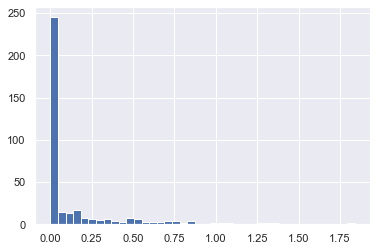

In [82]:
plt.hist(inches, 40)

##### Comparison Operators as ufuncs

In [83]:
x = np.array([1, 2, 3, 4, 5])
print(x > 3)
print(x < 3)
print(x <= 3)
print(x >= 3)
print(x == 3)
print(x != 3)

[False False False  True  True]
[ True  True False False False]
[ True  True  True False False]
[False False  True  True  True]
[False False  True False False]
[ True  True False  True  True]


In [84]:
# these will work on arrays of any size and shape
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

##### Working with Boolean Arrays

In [85]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


In [86]:
# how many values less than 6?
cnt = np.count_nonzero(x < 6)
print(cnt)
print('.')
np.sum(x < 6)   # False is interpreted as 0, and True is interpreted as 1

8
.


8

In [87]:
# how many values less than 6 in each row?
np.sum(x < 6, axis=1)

array([4, 2, 2])

In [88]:
# are there any values greater than 8?
np.any(x > 8)

True

In [89]:
# are all values less than 10?
np.all(x < 10)

True

In [90]:
# are all values in each row less than 8?
np.all(x < 8, axis=1)

array([ True, False,  True])

##### Boolean operators

In [91]:
# all days with rain less than 1.0 inche and greater than 0.5 inch
np.sum((inches > 0.5) & (inches < 1))
# OR
np.sum(~( (inches <= 0.5) | (inches >= 1) ))

29

In [92]:
print("Number days without rain       :", np.sum(inches == 0))
print("Number days with rain          :", np.sum(inches != 0))
print("Days with more than 0.5 inches :", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches   :", np.sum((inches > 0) & (inches < 0.2)))

Number days without rain       : 215
Number days with rain          : 150
Days with more than 0.5 inches : 37
Rainy days with < 0.2 inches   : 75


##### Boolean Arrays as Masks

In [93]:
print(x)
print(x < 5)
x[x < 5]

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]
[[False  True  True  True]
 [False False  True False]
 [ True  True False False]]


array([0, 3, 3, 3, 2, 4])

In [94]:
# construct a mask of all rainy days
rainy = (inches > 0)

# construct a mask of all summer days (June 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Median precip on rainy days in 2014 (inches)   :",
      np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches)  :",
      np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches) :",
      np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):",
      np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches)   : 0.19488188976377951
Median precip on summer days in 2014 (inches)  : 0.0
Maximum precip on summer days in 2014 (inches) : 0.8503937007874016
Median precip on non-summer rainy days (inches): 0.20078740157480315


In [95]:
# The difference and or on, and the operators & and | is this: and and or gauge the truth or falsehood of entire object, while & and | refer to bits within each object.
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True])

#### Fancy Indexing
Fancy indexing is like the simple indexing, but we pass arrays of indices in place of single scalars

In [96]:
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [97]:
[x[3], x[7], x[2]]
# OR
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

In [98]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [99]:
X = np.arange(12).reshape((3, 4))
print(X)

row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


array([ 2,  5, 11])

##### Combined Indexing

In [100]:
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [101]:
# combining fancy and simple indexing
X[2, [2, 0, 1]] # row 2 | columns 2, 0, 1

array([10,  8,  9])

In [102]:
# combine fancy indexing with slicing
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [103]:
# combine fancy indexing with masking
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

##### Example: Selecting Random Points

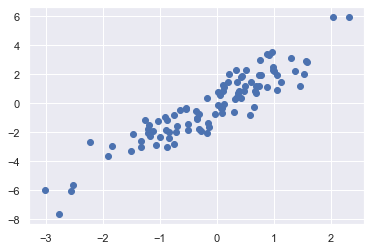

In [104]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
plt.scatter(X[:, 0], X[:, 1])

In [105]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices
selection = X[indices]  # fancy indexing here
selection.shape

(20, 2)

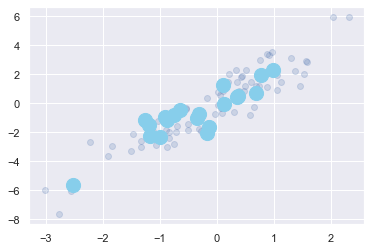

In [113]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(selection[:, 0], selection[:, 1], facecolor='skyblue', s=200)

#### Sorting Arrays
Fast Sorting in NumPy: np.sort and np.argsort

In [114]:
x = np.array([2, 1, 4, 3, 5])
# To return a sorted version of the array without modifying the input, you can use np.sort
np.sort(x)

array([1, 2, 3, 4, 5])

In [116]:
# to sort the array in-place
x.sort()
print(x)

[1 2 3 4 5]


In [117]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)   # which instead returns the indices of the sorted elements
print(i)

[1 0 3 2 4]


In [118]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [119]:
# sort each column of X
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [120]:
# sort each row of X
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

##### Partial Sorts: Partitioning

In [122]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)  # 3 smallest values to the left of the partition, remaining on the right (unsorted)

array([2, 1, 3, 4, 6, 5, 7])

In [123]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])